In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

### Central Limit Theorem ###
As its name implies, this theorem is central to the fields of probability, statistics, and data science. It explains the normal curve that kept appearing in the previous section.

Before we get to the theorem let's recall some facts from Data 8 and from earlier in this course.

### Standard Units ###
As we have seen earlier, a random variable $X$ converted to *standard units* becomes

$$
Z = \frac{X - \mu_X}{\sigma_X}
$$

$Z$ measures how far $X$ is from the mean, in units of the SD. In other words $Z$ measures how many SDs above average the value of $X$ is.

By linear function rules,
$$
E(Z) = 0 ~~~ \text{and} ~~~ SD(Z) = 1
$$
no matter what the distribution of $X$.

### The Standard Normal Curve ###
Recall from Data 8 that the standard normal curve is defined by a function often denoted by $\phi$, the lower case Greek letter phi.

$$
\phi(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z^2}, ~~~ -\infty < z < \infty
$$

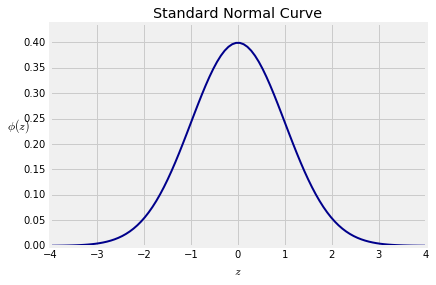

In [2]:
# HIDDEN
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1)
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$', rotation=0)
plt.title('Standard Normal Curve');

The curve is symmetric about 0. Its points of inflection are at $z=-1$ and $z=1$. You observed this in Data 8 and can prove it by calculus. 

**A Note on Terminology.** We will say that the curve has *location* parameter 0 and *scale* parameter 1. We will also use the terms *mean* for the location and *SD* for the scale, by analogy with the mean and SD of a random variable in standard units. Later in the course, we will show that this is consistent with definitions of the mean and SD of random variables that have a continuum of values.

The total area under the curve is 1. This requires some work to prove. You might have seen it in a calculus class. We will prove it later in the course by using probability methods. 

If the distribution of a random variable $X$ is roughly bell shaped, then the distribution of the standardized variable $Z$ roughly follows the standard normal curve above.

Notice that there is almost no probability outside the range $(-3, 3)$. Recall the following figures from Data 8.

- Area between -1 and 1: about 68%
- Area between -2 and 2: about 95%
- Area between -3 and 3: about 99.73%

### Normal Curves ###
The standard normal curve is one of a *family* of normal curves, each identified by its location and scale parameters, also known as its mean and SD.

The normal curve with mean $\mu$ and SD $\sigma$ is defined by
$$
f(x) ~ = ~ \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}, ~~~ \infty < x < \infty
$$

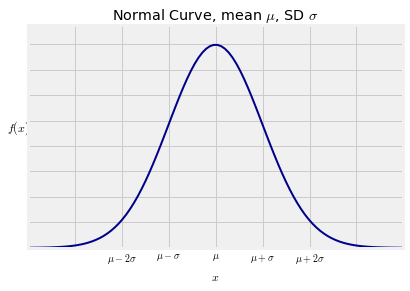

In [3]:
# HIDDEN
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1)
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.xticks(np.arange(-4, 4.1), ['','','$\mu-2\sigma$', '$\mu - \sigma$', '$\mu$', '$\mu+\sigma$','$\mu+2\sigma$',''])
plt.title('Normal Curve, mean $\mu$, SD $\sigma$');

The shape looks exactly the same as the standard normal curve. The only difference is in the scales of measurement on the axes. The center is now $\mu$ instead of 0, and the points of inflection are at a distance of $\sigma$ away from the center instead of 1.

This connection with the normal curve is the principal reason why the SD is used as a measure of spread. As to why the normal curve is important, read on.

### The Central Limit Theorem ###
Let $X_1, X_2, \ldots$ be i.i.d., each with mean $\mu$ and SD $\sigma$. Let $S_n = X_1 + X_2 + \cdots + X_n$. We know that 

$$
E(S_n) = n\mu ~~~~~~~~~~ SD(S_n) = \sqrt{n}\sigma
$$

What we don't yet know is the shape of the distribution of $S_n$. The *Central Limit Theorem* (CLT) tells us the rough shape when $n$ is large.

#### The Theorem ####
When $n$ is large, the distribution of the standardized sum 
$$
\frac{S_n - n\mu}{\sqrt{n}\sigma}
$$
**approximately follows the standard normal curve, regardless of the common distribution of the $X_i$'s**.

In other words, when $n$ is large, the distribution of $S_n$ is roughly normal with mean $n\mu$ and SD $\sqrt{n}\sigma$, regardless of the distribution of the $X_i$'s.

Exactly how large $n$ has to be for the approximation to be good does depend on the distribution of $X_i$. We will say more about that later. For now, assume that the sample sizes we are using are large enough for the normal approximation to be reasonable.

The proof of this theorem is beyond the scope of this course. But you have seen plenty of evidence for it in the simulations done in Data 8 and in the exact distributions of sums computed in the previous section.

#### Example ####
Suppose the weights of a sample of 100 people are i.i.d. with a mean of 150 pounds and an SD of 15 pounds. Then the total weight of the sampled people is roughly normal with mean $100 \times 150 = 15,000$ pounds and SD $\sqrt{100} \times 15 = 150$ pounds.

Who cares about the total weight of a random group of people? Ask those who construct stadiums, elevators, and airplanes.

You can plot this distribution using the `prob140` method `Plot_norm`. The arguments are the interval over which you want the curve to be drawn, the mean specified as `mu=mean`, and the SD specified as `sigma=sd`. Here `mean` and `sd` are the numerical values of the parameters.

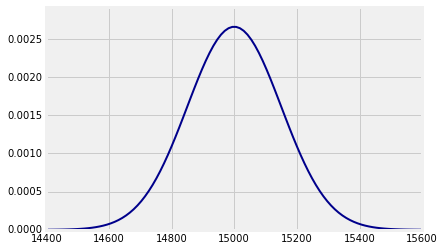

In [7]:
n = 100
mu = 150
sigma = 15

mean = n*mu
sd = (n**0.5)*sigma

plot_interval = make_array(mean-4*sd, mean+4*sd)

Plot_norm(plot_interval, mu=mean, sigma=sd)

### Probabilities Under the Normal Curve ###
Suppose we want to find the chance that the total weight of the sampled people is less than 15,100 pounds. That is approximately the gold area below. The approximation is in the use of the normal curve.

Notice the argument `right_end=15100`. That tells `Plot_norm` the right end of the interval to shade. If there is no left end specified, it is taken to be the left end of the plot interval.

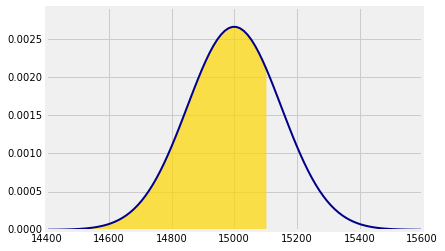

In [8]:
Plot_norm(plot_interval, mu=mean, sigma=sd, right_end=15100)

You know that the function that returns all the probability to the left of a point is called the *cumulative distribution function* (cdf) of the distribution. Call `stats.norm.cdf` with the appropriate parameters to see that the chance is just under 75%.

In [22]:
stats.norm.cdf(15100, mean, sd)

0.74750746245307709

Approximately what is the chance that the total weight is between 14,800 pounds and 15,100 pounds? Now we specify both `left_end` and `right_end`:

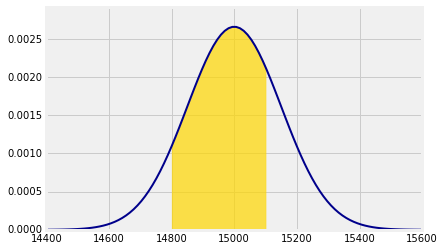

In [6]:
Plot_norm(plot_interval, mu=mean, sigma=sd, left_end=14800, right_end=15100)

The shaded area is about 65.6%.

In [24]:
stats.norm.cdf(15100, mean, sd) - stats.norm.cdf(14800, mean, sd)

0.65629624272720921

### The Standard Normal CDF $\Phi$ ###
There is really only one normal curve that matters – the standard normal curve. All the others are obtained by linear transformations of the horizontal axis. Therefore all the calculations above can be done in terms of the standard normal cdf by standardizing, as follows.

To find the approximate chance that the total weight is less than 15,100 pounds, first standardize the weight and then use the standard normal cdf.

In [29]:
z_right = (15100 - mean)/sd

stats.norm.cdf(z_right)  # The standard curve is the default

0.74750746245307709

To find the approximate chance that the total weight is between 14,800 pounds and 15,100 pounds:

In [30]:
z_left = (14800 - mean)/sd

stats.norm.cdf(z_right) - stats.norm.cdf(z_left)

0.65629624272720921

A common notation for the standard normal cdf is the upper case letter $\Phi$, because it is the integral of $\phi$:

$$
\Phi(x) = \int_{-\infty}^x \phi(z)dz, ~~~~ -\infty < x < \infty
$$

This integral, while finite, does not have a closed form formula that can be written in terms of arithmetic operations, powers, trigonometric functions, exponential and logarithmic functions, and composition. It has to be approximated by numerical integration. That is why every statistical system has a built-in function such as `stats.norm.cdf` that provides excellent approximations.

Standardizing and the standard normal cdf $\Phi$ together provide a compact notation for areas under all normal curves. We don't have to use different functions for different values of the parameters.

Under the assumptions of the CLT, for large $n$ we have the approximation

$$
P(S_n \le x) ~ \approx ~ \Phi \big{(} \frac{x - n\mu}{\sqrt{n}\sigma} \big{)} ~~~ \text{for all } x
$$

As you saw in Data 8, approximations often don't do well in the tails of distributions. If you use the CLT to approximate probabilities of regions that are in the tails, be aware that the approximations might be very rough.

### Is it Normal? ###
A binomial $(n, p)$ is the sum of $n$ i.i.d. indicators. If $n$ is large, the CLT says the distribution should be roughly normal, no matter what $p$ is. But we said in Chapter 6 that if $n$ is large and $p$ is small, then the binomial distribution is roughly Poisson.

So which is it? Normal or Poisson?

The answer depends on how large $n$ is. For every fixed $p$, no matter how small, there is threshold (depending on $p$) so that for all $n$ larger than that threshold the binomial $(n, p)$ distribution is roughly normal.

If the binomial distribution resembles a Poisson, that means $n$ hasn't crossed the normal threshold. 

Where is the threshold? You will find it in your next lab.